<a href="https://colab.research.google.com/github/husam1986/RAN_Chest_x_ray/blob/main/proposed_3Clases_M2_RAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Husam Imad AbdulRazzaq**
proposed metod 1

3 classes _ classify     

new code for RAN


intialize

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply

from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import time, os, datetime
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

import os
import random

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,TensorBoard, LearningRateScheduler
from tensorflow.keras.models import load_model


1- Residual_Unit

2- Attention_Block

4-1 hardwer info

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

  from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')



print("TF version: ",tf.__version__)
print("Keras version:",tf.keras.__version__)

Fri Jul  7 03:02:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Extracting Files

In [ ]:
c_tr = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images'
n_tr = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Normal/images'
p_tr = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

c_vld = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/out'
n_vld = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Normal/out'
p_vld = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/out'

In [ ]:
random.seed(42)
C_filenames_train = os.listdir(c_tr)[1:1100]
P_filenames_train = os.listdir(p_tr)[1:1100]
N_filenames_train = os.listdir(n_tr)[1:1100]

C_filenames_validation = os.listdir(c_vld)[1:245]
P_filenames_validation = os.listdir(p_vld)[1:245]
N_filenames_validation = os.listdir(n_vld)[1:245]
"""filenames = os.listdir(p)[1:1300] + os.listdir(c)[1:1300]"""
"""c"""


'c'

labels

In [ ]:
"""C_categories = []
for filename in C_filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        C_categories.append(str(0))
    else: print(filename)

P_categories = []
for filename in P_filenames:
    category = filename.split('-')[0]
    if category == 'Viral Pneumonia':
        P_categories.append(str(1))
    else: print(filename)

N_categories = []
for filename in N_filenames:
    category = filename.split('-')[0]
    if category == 'Normal':
        N_categories.append(str(2))
    else: print(filename)
"""
c_Zeros_tr = []
for filename in C_filenames_train:
    c_Zeros_tr.append(str(0))
p_Oness_tr = []
for filename in P_filenames_train:
    p_Oness_tr.append(str(1))
n_Tows_tr = []
for filename in N_filenames_train:
    n_Tows_tr.append(str(2))

c_Zeros_vld = []
for filename in C_filenames_validation:
    c_Zeros_vld.append(str(0))
p_Oness_vld = []
for filename in P_filenames_validation:
    p_Oness_vld.append(str(1))
n_Tows_vld = []
for filename in N_filenames_validation:
    n_Tows_vld.append(str(2))


Converting to Dataframe

In [ ]:
from posix import remove
"""c"""
for i in range(len(C_filenames_train)):
        C_filenames_train[i] = os.path.join(c_tr, C_filenames_train[i])
for i in range(len(P_filenames_train)):
        P_filenames_train[i] = os.path.join(p_tr, P_filenames_train[i])
for i in range(len(N_filenames_train)):
        N_filenames_train[i] = os.path.join(n_tr, N_filenames_train[i])

for i in range(len(C_filenames_validation)):
        C_filenames_validation[i] = os.path.join(c_vld, C_filenames_validation[i])
for i in range(len(P_filenames_validation)):
        P_filenames_validation[i] = os.path.join(p_vld, P_filenames_validation[i])
for i in range(len(N_filenames_validation)):
        N_filenames_validation[i] = os.path.join(n_vld, N_filenames_validation[i])

#training dataset dataFrames
df_p_n_tr = pd.DataFrame({
    'filename': P_filenames_train + N_filenames_train,
    'category': p_Oness_tr + c_Zeros_tr
})

df_c_n_tr = pd.DataFrame({
    'filename': C_filenames_train + N_filenames_train,
    'category': p_Oness_tr + c_Zeros_tr # as its saved model traiend
})

df_c_p_tr = pd.DataFrame({
    'filename': C_filenames_train + P_filenames_train,
    'category': c_Zeros_tr + p_Oness_tr
})


df_all_tr = pd.DataFrame({
    'filename': C_filenames_train + P_filenames_train + N_filenames_train,
    'category': c_Zeros_tr + p_Oness_tr + n_Tows_tr
})
"""df = df_t.sample(frac=1)"""

df_p_n_tr.head()
df_c_n_tr.head()
df_c_p_tr.head()
df_all_tr.head()

#_validation dataset dataFrames
df_p_n_vld = pd.DataFrame({
    'filename': P_filenames_validation + N_filenames_validation,
    'category': p_Oness_vld + c_Zeros_vld
})

df_c_n_vld = pd.DataFrame({
    'filename': C_filenames_validation + N_filenames_validation,
    'category': p_Oness_vld + c_Zeros_vld # as its saved model traiend
})

df_c_p_vld = pd.DataFrame({
    'filename': C_filenames_validation + P_filenames_validation,
    'category': c_Zeros_vld + p_Oness_vld
})


df_all_vld = pd.DataFrame({
    'filename': C_filenames_validation + P_filenames_validation + N_filenames_validation,
    'category': c_Zeros_vld + p_Oness_vld + n_Tows_vld
})
"""df = df_t.sample(frac=1)"""

df_p_n_vld.head()
df_c_n_vld.head()
df_c_p_vld.head()
df_all_vld.head()

,filename,category
0,/content/drive/Othercomputers/Hp8570/GoogleDri...,0
1,/content/drive/Othercomputers/Hp8570/GoogleDri...,0
2,/content/drive/Othercomputers/Hp8570/GoogleDri...,0
3,/content/drive/Othercomputers/Hp8570/GoogleDri...,0
4,/content/drive/Othercomputers/Hp8570/GoogleDri...,0


Exploratory Data Analysis

Training Dataset


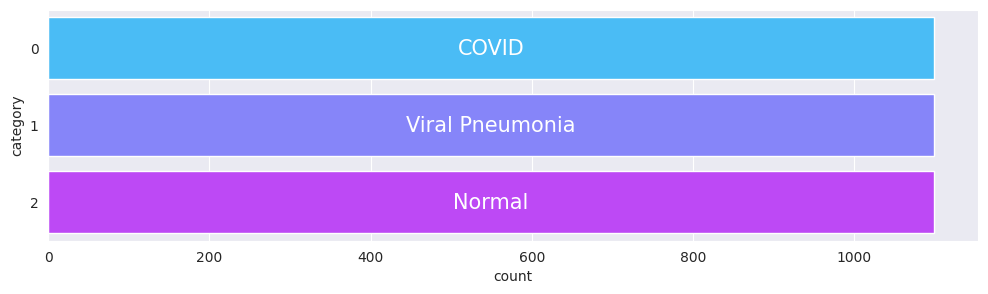

Validation Dataset


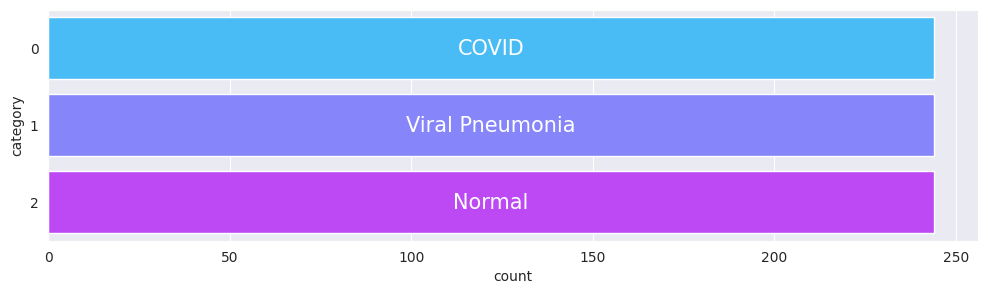

In [ ]:

print("Training Dataset")
plt.figure(figsize=(12,3))
splot = sns.countplot(data = df_all_tr.sort_values(by='category'), y ='category', palette='cool', saturation=0.9)
plt.bar_label(container=splot.containers[0],
              labels=['COVID', 'Viral Pneumonia','Normal'],
              label_type='center', size=15, color='w')
plt.show()

print("Validation Dataset")
plt.figure(figsize=(12,3))
splot = sns.countplot(data = df_all_vld.sort_values(by='category'), y ='category', palette='cool', saturation=0.9)
plt.bar_label(container=splot.containers[0],
              labels=['COVID', 'Viral Pneumonia','Normal'],
              label_type='center', size=15, color='w')
plt.show()

Data Visualization

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images/COVID-748.png


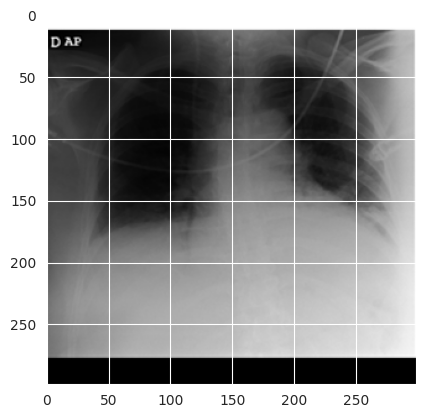

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/out/COVID-2532.png


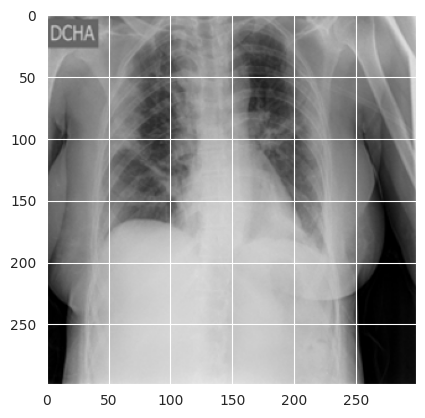

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Normal/images/Normal-2186.png


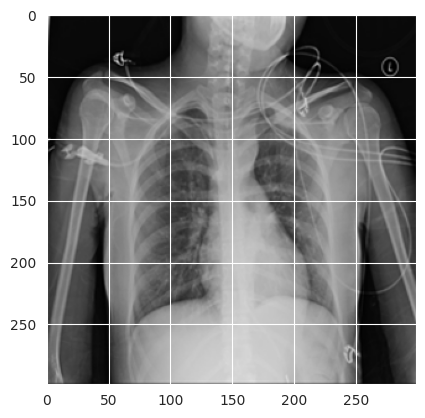

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/out/Viral Pneumonia-1105.png


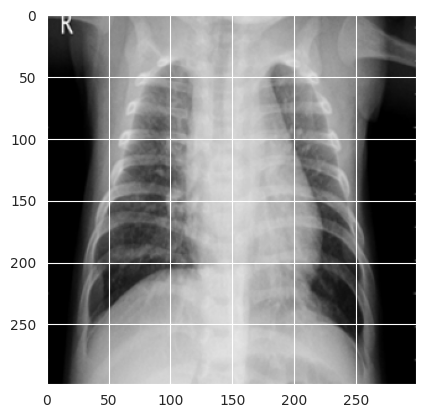

In [ ]:
sample = random.choice(df_c_p_tr['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()

sample = random.choice(df_c_n_vld['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()

sample = random.choice(df_p_n_tr['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()

sample = random.choice(df_all_vld['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()


Splitting Train, Validation & Test Data

In [ ]:
batchSize =64

"""train_data, test_valid_data = train_test_split(df, test_size=0.2, random_state = 42, shuffle=True, stratify=df['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)"""

"train_data, test_valid_data = train_test_split(df, test_size=0.2, random_state = 42, shuffle=True, stratify=df['category'])\ntrain_data = train_data.reset_index(drop=True)\ntest_valid_data = test_valid_data.reset_index(drop=True)\n\ntest_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,\n                                         shuffle=True, stratify=test_valid_data['category'])\ntest_data = test_data.reset_index(drop=True)\nvalid_data = valid_data.reset_index(drop=True)"

ImageDataGenerator

 Data Augmentation

In [ ]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
all_train_generator = train_data_gen.flow_from_dataframe(
    df_all_tr,
    x_col='filename',
    y_col='category',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=batchSize
)

Found 3297 validated image filenames belonging to 3 classes.


In [ ]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

p_n_valid_generator = valid_data_gen.flow_from_dataframe(
    df_p_n_vld,
    x_col='filename',
    y_col='category',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=batchSize
)

c_n_valid_generator = valid_data_gen.flow_from_dataframe(
    df_c_n_vld,
    x_col='filename',
    y_col='category',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=batchSize
)

c_p_valid_generator = valid_data_gen.flow_from_dataframe(
    df_c_p_vld,
    x_col='filename',
    y_col='category',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=batchSize
)

all_valid_generator = valid_data_gen.flow_from_dataframe(
    df_all_vld,
    x_col='filename',
    y_col='category',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=batchSize
)

Found 488 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.
Found 732 validated image filenames belonging to 3 classes.


load saved model ______________________=====


In [ ]:
from tensorflow.keras.models import load_model


# load model
model_c_p = load_model('/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/2class-c-pn-m2-6-7.h5')
model_p_n = load_model('/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/2class-n-pc-m2-6-7.h5')
model_c_n = load_model('/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/2class-p-cn-m2-6-7.h5')

#model_c_p.summary()


# input  Train  ds into predict function for get list of data used for training proposed 3classes model
total_images = all_train_generator.n
steps = total_images//batchSize
print(steps)

y_tr , prdc_tr = [] , []
for i in range(steps):
    a , b = all_train_generator.next()

    predict_c_p = model_c_p.predict(x= np.array(a))
    predict_p_n = model_p_n.predict(x= np.array(a))
    predict_c_n = model_c_n.predict(x= np.array(a))


    #print('predict_c_p list:', predict_c_p)
    #print('predict_p_n list:', predict_p_n)
    #print('predict_c_n list:', predict_c_n)
    print(i)
    #x_.extend(a)
    y_tr.extend(b)
    predict = np.concatenate((predict_c_p,predict_p_n,predict_c_n),axis=1)
    prdc_tr.extend(predict)
    #print('############# predict_full list:', predict)

    #print("b is : ", np.argmax(b, axis=1,keepdims=True))
    #print("pred is : ", np.argmax(predictor, axis=1,keepdims=True))
    #p1= np.concatenate((predictor,np.argmax(b, axis=1,keepdims=True)),axis=1)
    #print("p1 is : ",p1)

print("y and prod : ____________________________________________________________")
#print(y_)
#print(prdc_)


51
2/2 [==============================] - 2s 503ms/step
0
2/2 [==============================] - 1s 460ms/step
1
2/2 [==============================] - 1s 456ms/step
2
2/2 [==============================] - 1s 459ms/step
3
2/2 [==============================] - 1s 468ms/step
4
2/2 [==============================] - 1s 465ms/step
5
2/2 [==============================] - 1s 467ms/step
6
2/2 [==============================] - 1s 470ms/step
7
2/2 [==============================] - 1s 474ms/step
8
2/2 [==============================] - 1s 472ms/step
9
2/2 [==============================] - 1s 477ms/step
10
2/2 [==============================] - 1s 475ms/step
11
2/2 [==============================] - 1s 478ms/step
12
2/2 [==============================] - 1s 485ms/step
13
2/2 [==============================] - 1s 485ms/step
14
2/2 [==============================] - 1s 488ms/step
15
2/2 [==============================] - 1s 489ms/step
16
2/2 [==============================] - 1s 493ms/step
17

In [ ]:


# input  Validation   ds into predict function for get list of data used for training proposed 3classes model
total_images = all_valid_generator.n
steps = total_images//batchSize
print(steps)

y_vld , prdc_vld = [] , []
for i in range(steps):
    a , b = all_valid_generator.next()

    predict_c_p = model_c_p.predict(x= np.array(a))
    predict_p_n = model_p_n.predict(x= np.array(a))
    predict_c_n = model_c_n.predict(x= np.array(a))


    #print('predict_c_p list:', predict_c_p)
    #print('predict_p_n list:', predict_p_n)
    #print('predict_c_n list:', predict_c_n)
    print(i)
    #x_.extend(a)
    y_vld.extend(b)
    predict = np.concatenate((predict_c_p,predict_p_n,predict_c_n),axis=1)
    prdc_vld.extend(predict)




11
2/2 [==============================] - 1s 495ms/step
0
2/2 [==============================] - 1s 495ms/step
1
2/2 [==============================] - 1s 497ms/step
2
2/2 [==============================] - 1s 499ms/step
3
2/2 [==============================] - 1s 498ms/step
4
2/2 [==============================] - 1s 496ms/step
5
2/2 [==============================] - 1s 494ms/step
6
2/2 [==============================] - 1s 495ms/step
7
2/2 [==============================] - 1s 494ms/step
8
2/2 [==============================] - 1s 498ms/step
9
2/2 [==============================] - 1s 495ms/step
10


In [ ]:

# evaluation
val_scores = model_c_p.evaluate_generator(c_p_valid_generator, verbose=0)
print('c p validation loss:', val_scores[0])
print('validation accuracy:', val_scores[1])
# evaluation
val_scores = model_p_n.evaluate_generator(p_n_valid_generator, verbose=0)
print('p n validation loss:', val_scores[0])
print('validation accuracy:', val_scores[1])
# evaluation
val_scores = model_c_n.evaluate_generator(c_n_valid_generator, verbose=0)
print('c n validation loss:', val_scores[0])
print('validation accuracy:', val_scores[1])

c p validation loss: 0.16274775564670563
validation accuracy: 0.9426229596138
p n validation loss: 0.3388165235519409
validation accuracy: 0.8831967115402222
c n validation loss: 5.652184963226318
validation accuracy: 0.5


proposed 3 class Combining model

In [ ]:
def PropsedNN(shape, n_classes, dropout=None, regularization=0.01):

    """
    :param shape: The tuple of input data.
    :param in_channel: The 4-th dimension (channel number) of input weight matrix. For example, in_channel=3 means the input contains 3 channels.
    :param kernel_size: Integer. the shape of the kernel. For example, default kernel_size = 3 means you have a 3*3 kernel.
    :param n_classes: Integer. The number of target classes. For example, n_classes = 10 means you have 10 class labels.
    :param dropout: Float between 0 and 1. Fraction of the input units to drop.
    :param regularization: Float. Fraction of the input units to drop.
    """
    input_data = Input(shape=shape)  # 6
    x = Dense(32, activation='relu')(input_data)

    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout)(x)

    x = Dense(128,  activation='relu')(x)
    x = Dropout(dropout)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)

    x = Dense(256, activation='relu')(x)
    #x = BatchNormalization()(x)
    x = Dropout(dropout)(x)


    x = Dense(128, activation='relu')(x)
    #x = BatchNormalization()(x)
    x = Dropout(dropout)(x)

    x = Dense(64, activation='relu')(x)
    #x = BatchNormalization()(x)
    x = Dropout(dropout)(x)

    x = Dense(32, activation='relu')(x)

    x = Dense(16, activation='relu')(x)

    output = Dense(n_classes, kernel_regularizer=l2(regularization), activation='softmax')(x)
    model = Model(input_data, output)

    return model

7- Set Learning Rate and Optimizer


In [ ]:
# define learning rate scheduler
"""def lr_schedule(epoch):
    lr = 1e-6
    if epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 50:
        lr *= 1e-1
    print('Learning rate:', lr)
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)
"""
# define model
model = PropsedNN(shape=(6), n_classes=3, dropout=0.2, regularization=0.01)

# define loss, metrics, optimizer
# optimizer = SGD(lr = lr_schedule(0), momentum=0.9, nesterov=True)
optimizer = Adam( 1e-6 )
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024 

8-Training and Evaluation


In [ ]:
# training
epc = 600

start = time.time()
"""
# training
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
step_size_train = train_generator.n // train_generator.batch_size

# validation
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)
step_size_val = val_generator.n // val_generator.batch_size

# test
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)
step_size_test = test_generator.n // test_generator.batch_size
"""
# usefull callbacks
log_dir='Logs/' + '56full'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
"""lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1)
early_stopper = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)"""
"""
model.fit_generator(train_generator,
                    steps_per_epoch = step_size_train,
                    epochs = epc,
                    validation_data = val_generator,
                    validation_steps = step_size_val,
                    callbacks=[tensorboard_callback, lr_reducer, lr_scheduler, early_stopper])
"""
xx = np.array(prdc_vld)
yy = np.array(y_vld)
print(xx)
print(yy)

history = model.fit(x = np.array(prdc_tr),y = np.array(y_tr)
                      ,validation_data=(np.array(prdc_vld), np.array(y_vld))
                      ,epochs = epc,verbose=True)

end = time.time()
print("Time taken by above cell in minutes is {}.".format((end-start)/60))

# evaluation
##val_scores = model.evaluate_generator(valid_generator, verbose=0)
"""test_scores = model.evaluate_generator(test_generator, verbose=1)"""
#print('validation loss:', val_scores[0])
#print('validation accuracy:', val_scores[1])


[[8.7040585e-01 1.2959415e-01 2.6665968e-01 7.3334032e-01 2.7183830e-03
  9.9728155e-01]
 [9.3201781e-03 9.9067980e-01 6.9218123e-01 3.0781880e-01 9.7044545e-01
  2.9554533e-02]
 [5.7866503e-02 9.4213355e-01 9.9903047e-01 9.6957188e-04 1.4642849e-04
  9.9985349e-01]
 ...
 [8.5558044e-05 9.9991441e-01 1.2532760e-03 9.9874675e-01 9.9999905e-01
  9.8099486e-07]
 [2.3563919e-03 9.9764353e-01 1.1462569e-01 8.8537431e-01 9.9999809e-01
  1.8892712e-06]
 [1.3768850e-04 9.9986231e-01 1.2563375e-02 9.8743665e-01 9.9990809e-01
  9.1925664e-05]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Epoch 1/600
102/102 [==============================] - 6s 7ms/step - loss: 1.1558 - accuracy: 0.3419 - val_loss: 1.1524 - val_accuracy: 0.6477
Epoch 2/600
102/102 [==============================] - 1s 5ms/step - loss: 1.1545 - accuracy: 0.3572 - val_loss: 1.1515 - val_accuracy: 0.6491
Epoch 3/600
102/102 [==============================] - 1s 5ms/step - loss: 1.1548 - accuracy: 0.

'test_scores = model.evaluate_generator(test_generator, verbose=1)'

Saving Model

In [ ]:
model.save('/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/Covid-f-3-7xxx.h5')

Plotting

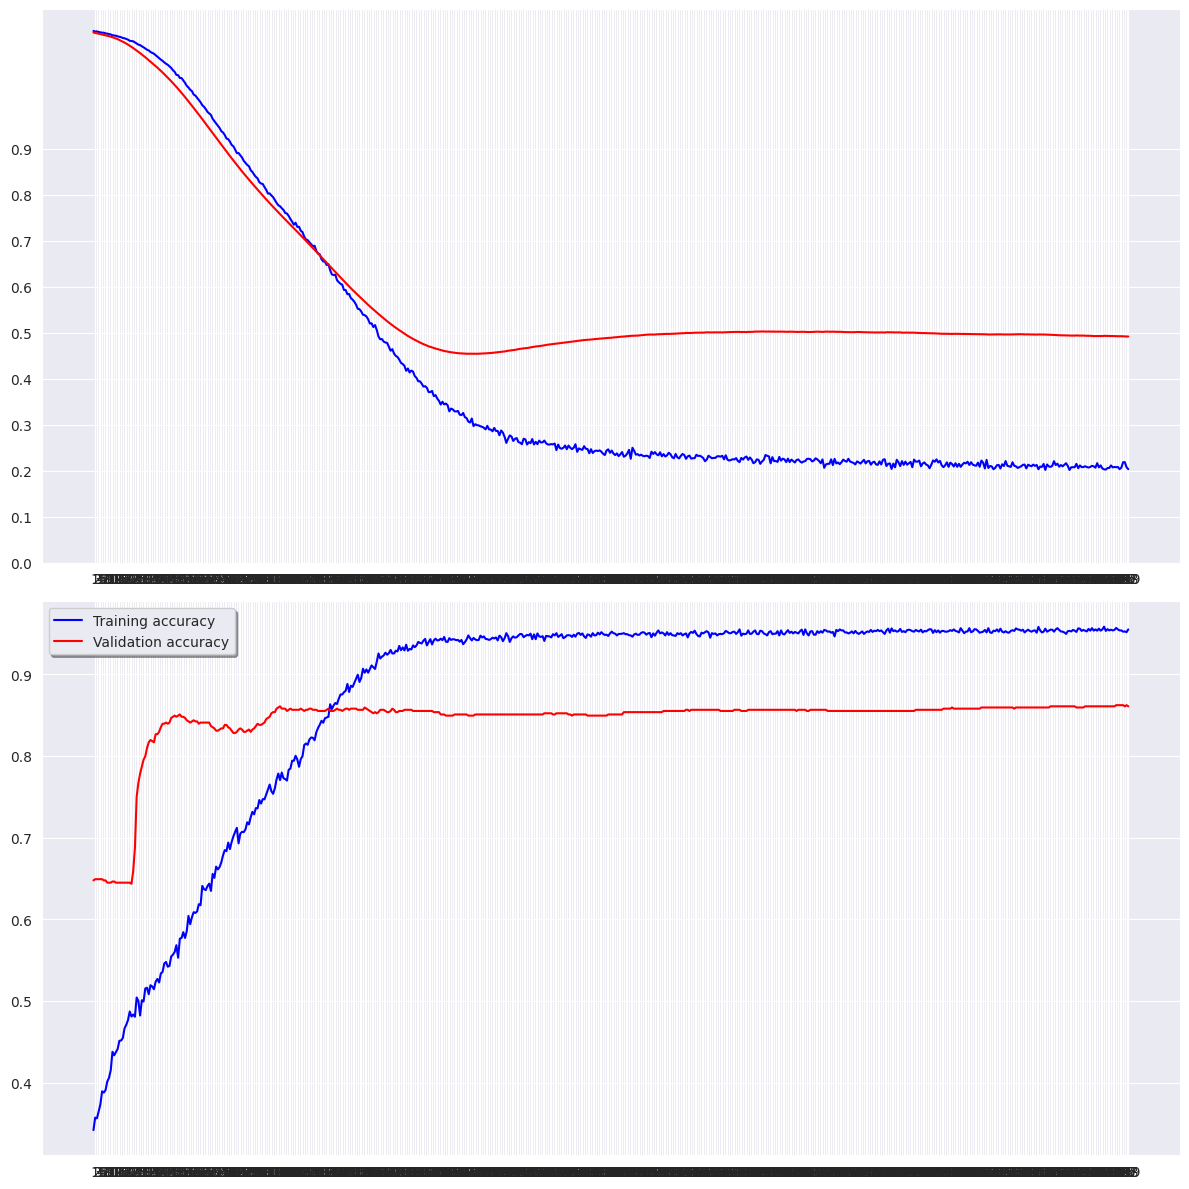

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epc, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epc, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


9-Performance Analysis


In [ ]:
%load_ext tensorboard
%tensorboard --logdir Logs/


<IPython.core.display.Javascript object>

Model Testing

In [ ]:
sample = random.choice(df_all_vld['filename'])

fileLastname = sample.split('/')[-1:][0]
category = fileLastname.split('-')[0]
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Normal':
    true = 'Normal'

print(f'True value is : {true}')

image = load_img(sample, target_size=(512, 512))
img = img_to_array(image)
img = img.reshape((1, 512, 512, 3))
img=img.astype('float32')/ 255.0

result = model.predict(img)
print(result)
result = np.argmax(result, axis=-1)
print('Prediction is:')
if result == 2:
    print("Normal")
elif result == 1:
    print("Viral Pneumonia")
elif result == 0:
    print("COVID +", result)
else:
  print("none")
plt.imshow(image)


True value is : Viral Pneumonia


ValueError: ignored